In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

2023-11-11 20:34:16.107916: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-11 20:34:16.109332: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 20:34:16.132789: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 20:34:16.132812: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 20:34:16.132829: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
os.getcwd()

'/home/arhan/mriproj/parkinsons-mri'

In [4]:
train_dir = './parkinsons_dataset/train/'
val_dir = './parkinsons_dataset/validation/'

**Data Loading and Augmentation**

In [5]:
train_batches = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest').flow_from_directory(directory=train_dir, target_size=(224,224), classes=['normal', 'parkinson'], batch_size=10)

val_batches = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest').flow_from_directory(directory=val_dir, target_size=(224,224), classes=['normal', 'parkinson'], batch_size=10)


Found 700 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


**Plotting images**

In [6]:
imgs, labels = next(train_batches)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

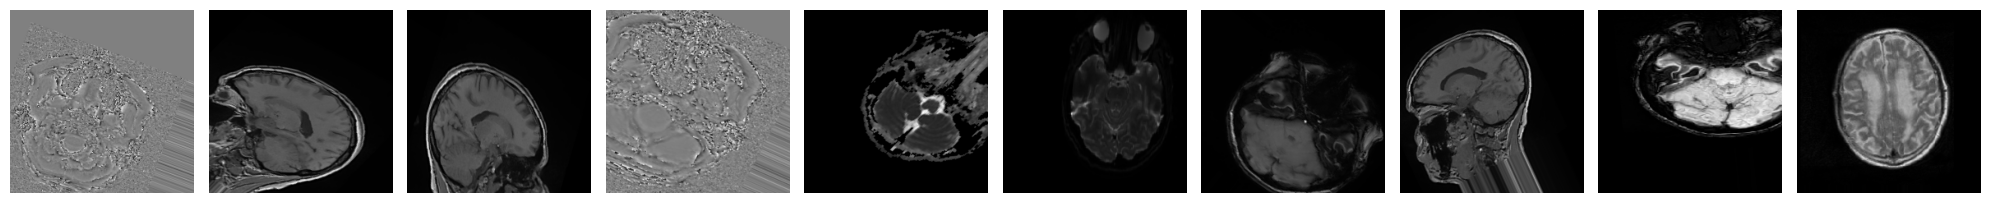

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [8]:
plotImages(imgs)
print(labels)

**Model making**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding = 'same', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

2023-11-11 20:34:17.834226: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 20:34:17.834505: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [12]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [13]:
history = model.fit(
    x=train_batches, 
    validation_data=val_batches, 
    epochs=12, 
    verbose=2,
)

Epoch 1/12
70/70 - 12s - loss: 0.5701 - accuracy: 0.7043 - val_loss: 0.5880 - val_accuracy: 0.7786 - 12s/epoch - 167ms/step
Epoch 2/12
70/70 - 11s - loss: 0.5331 - accuracy: 0.7329 - val_loss: 0.5654 - val_accuracy: 0.8092 - 11s/epoch - 153ms/step
Epoch 3/12
70/70 - 11s - loss: 0.5168 - accuracy: 0.7371 - val_loss: 0.5368 - val_accuracy: 0.7939 - 11s/epoch - 152ms/step
Epoch 4/12
70/70 - 10s - loss: 0.4879 - accuracy: 0.7614 - val_loss: 0.5203 - val_accuracy: 0.8015 - 10s/epoch - 148ms/step
Epoch 5/12
70/70 - 11s - loss: 0.4763 - accuracy: 0.7700 - val_loss: 0.4448 - val_accuracy: 0.8397 - 11s/epoch - 161ms/step
Epoch 6/12
70/70 - 11s - loss: 0.4686 - accuracy: 0.7757 - val_loss: 0.4745 - val_accuracy: 0.8397 - 11s/epoch - 151ms/step
Epoch 7/12
70/70 - 10s - loss: 0.4493 - accuracy: 0.7957 - val_loss: 0.5889 - val_accuracy: 0.6870 - 10s/epoch - 149ms/step
Epoch 8/12
70/70 - 10s - loss: 0.4365 - accuracy: 0.7914 - val_loss: 0.5752 - val_accuracy: 0.7328 - 10s/epoch - 149ms/step
Epoch 9/

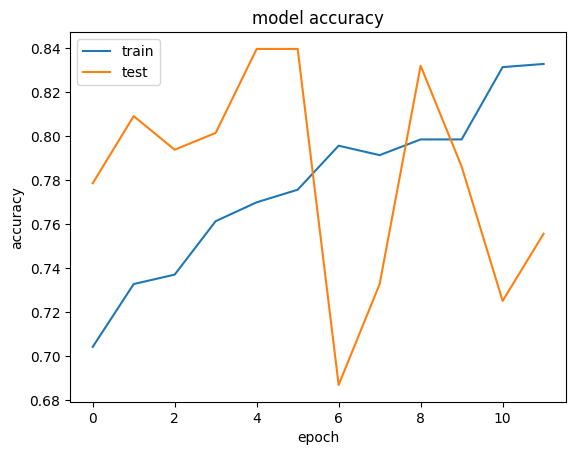

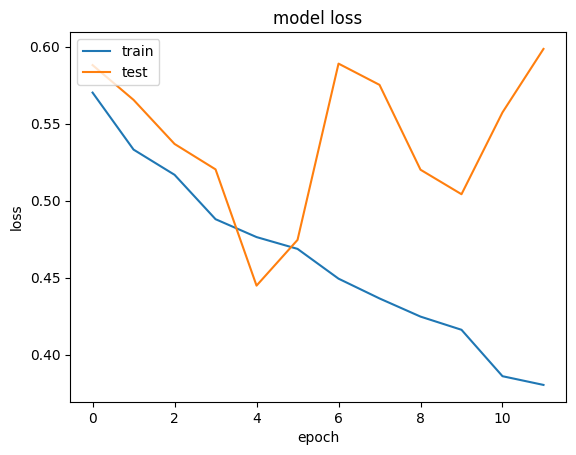

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save('basic5_80.keras')

**Testing Data**

In [16]:
test_batches = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest', preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=val_dir, target_size=(224,224), classes=['normal', 'parkinson'], batch_size=10, shuffle=False)

Found 131 images belonging to 2 classes.


In [17]:
model = tf.keras.models.load_model('models/Basic/basic4_84.h5')

OSError: No file or directory found at models/Basic/basic4_84.h5

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_activations=True)

In [ ]:
test_imgs, test_labels = next(train_batches)
# plotImages(test_imgs)
print(test_labels)

In [ ]:
predictions = model.predict(x=test_imgs, verbose=1)

In [ ]:
np.round(predictions[:10])